## Libraries

In [2]:
import numpy as np
import pandas as pd
import pyathena as pa
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame
from numpy.random import randn

## Variables

In [3]:
# Top EMPs:   
top_emps = ['DENBW','DEDCS','NLTNM','ATHTB','DE8PS','NLGFX','DEMEG','DE911','DETRA','FIVIR','NLLMS','DEKRT','DECHC','ATLAG','DE8RB','DEJCR','ITELX','ATS01','CHCCE','FRCMP']

#current_month:
current_month = '2023-05'


# Import input data directly from Athena

In [4]:
# connect to Athena and execute the query
    
conn = pa.connect(
                    s3_staging_dir="s3://aws-athena-query-results-539081307534-eu-central-1/",
                    region_name="eu-central-1"
                 )


sql = """SELECT count(*) as monthly_cdr, provider_external_id_normalized, SUBSTR(stored_timestamp, 1, 7) as aggregated_date
             FROM "default"."cdr_histories_all_data"
             WHERE stored_timestamp > '2022-01-01'
             GROUP BY SUBSTR(stored_timestamp, 1, 7), provider_external_id_normalized
             HAVING COUNT(*) > 1 
             ORDER BY monthly_cdr DESC
             """

df = pd.read_sql(sql, conn)
df.head(5)

#conn.close()



/Users/bita/anaconda3/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,monthly_cdr,provider_external_id_normalized,aggregated_date
0,655020,DENBW,2022-12
1,610367,DENBW,2023-01
2,594873,DENBW,2022-11
3,581619,DENBW,2023-04
4,572136,DENBW,2022-10


# (only if above would not work) Import data from CSV file 

In [ ]:
# load the EMP-historical-transaction csv file
df = pd.read_csv('/Users/bita/Library/CloudStorage/OneDrive-HubjectGmbH/Jupyter Notebook/Input Data/KPI/CDRNumbers_MonthlyAggregated_EMP transactions_Jan2022-May2023.csv')
               
df.head()            

## Top x EMP Monthly Growth

<Axes: xlabel='aggregated_date'>

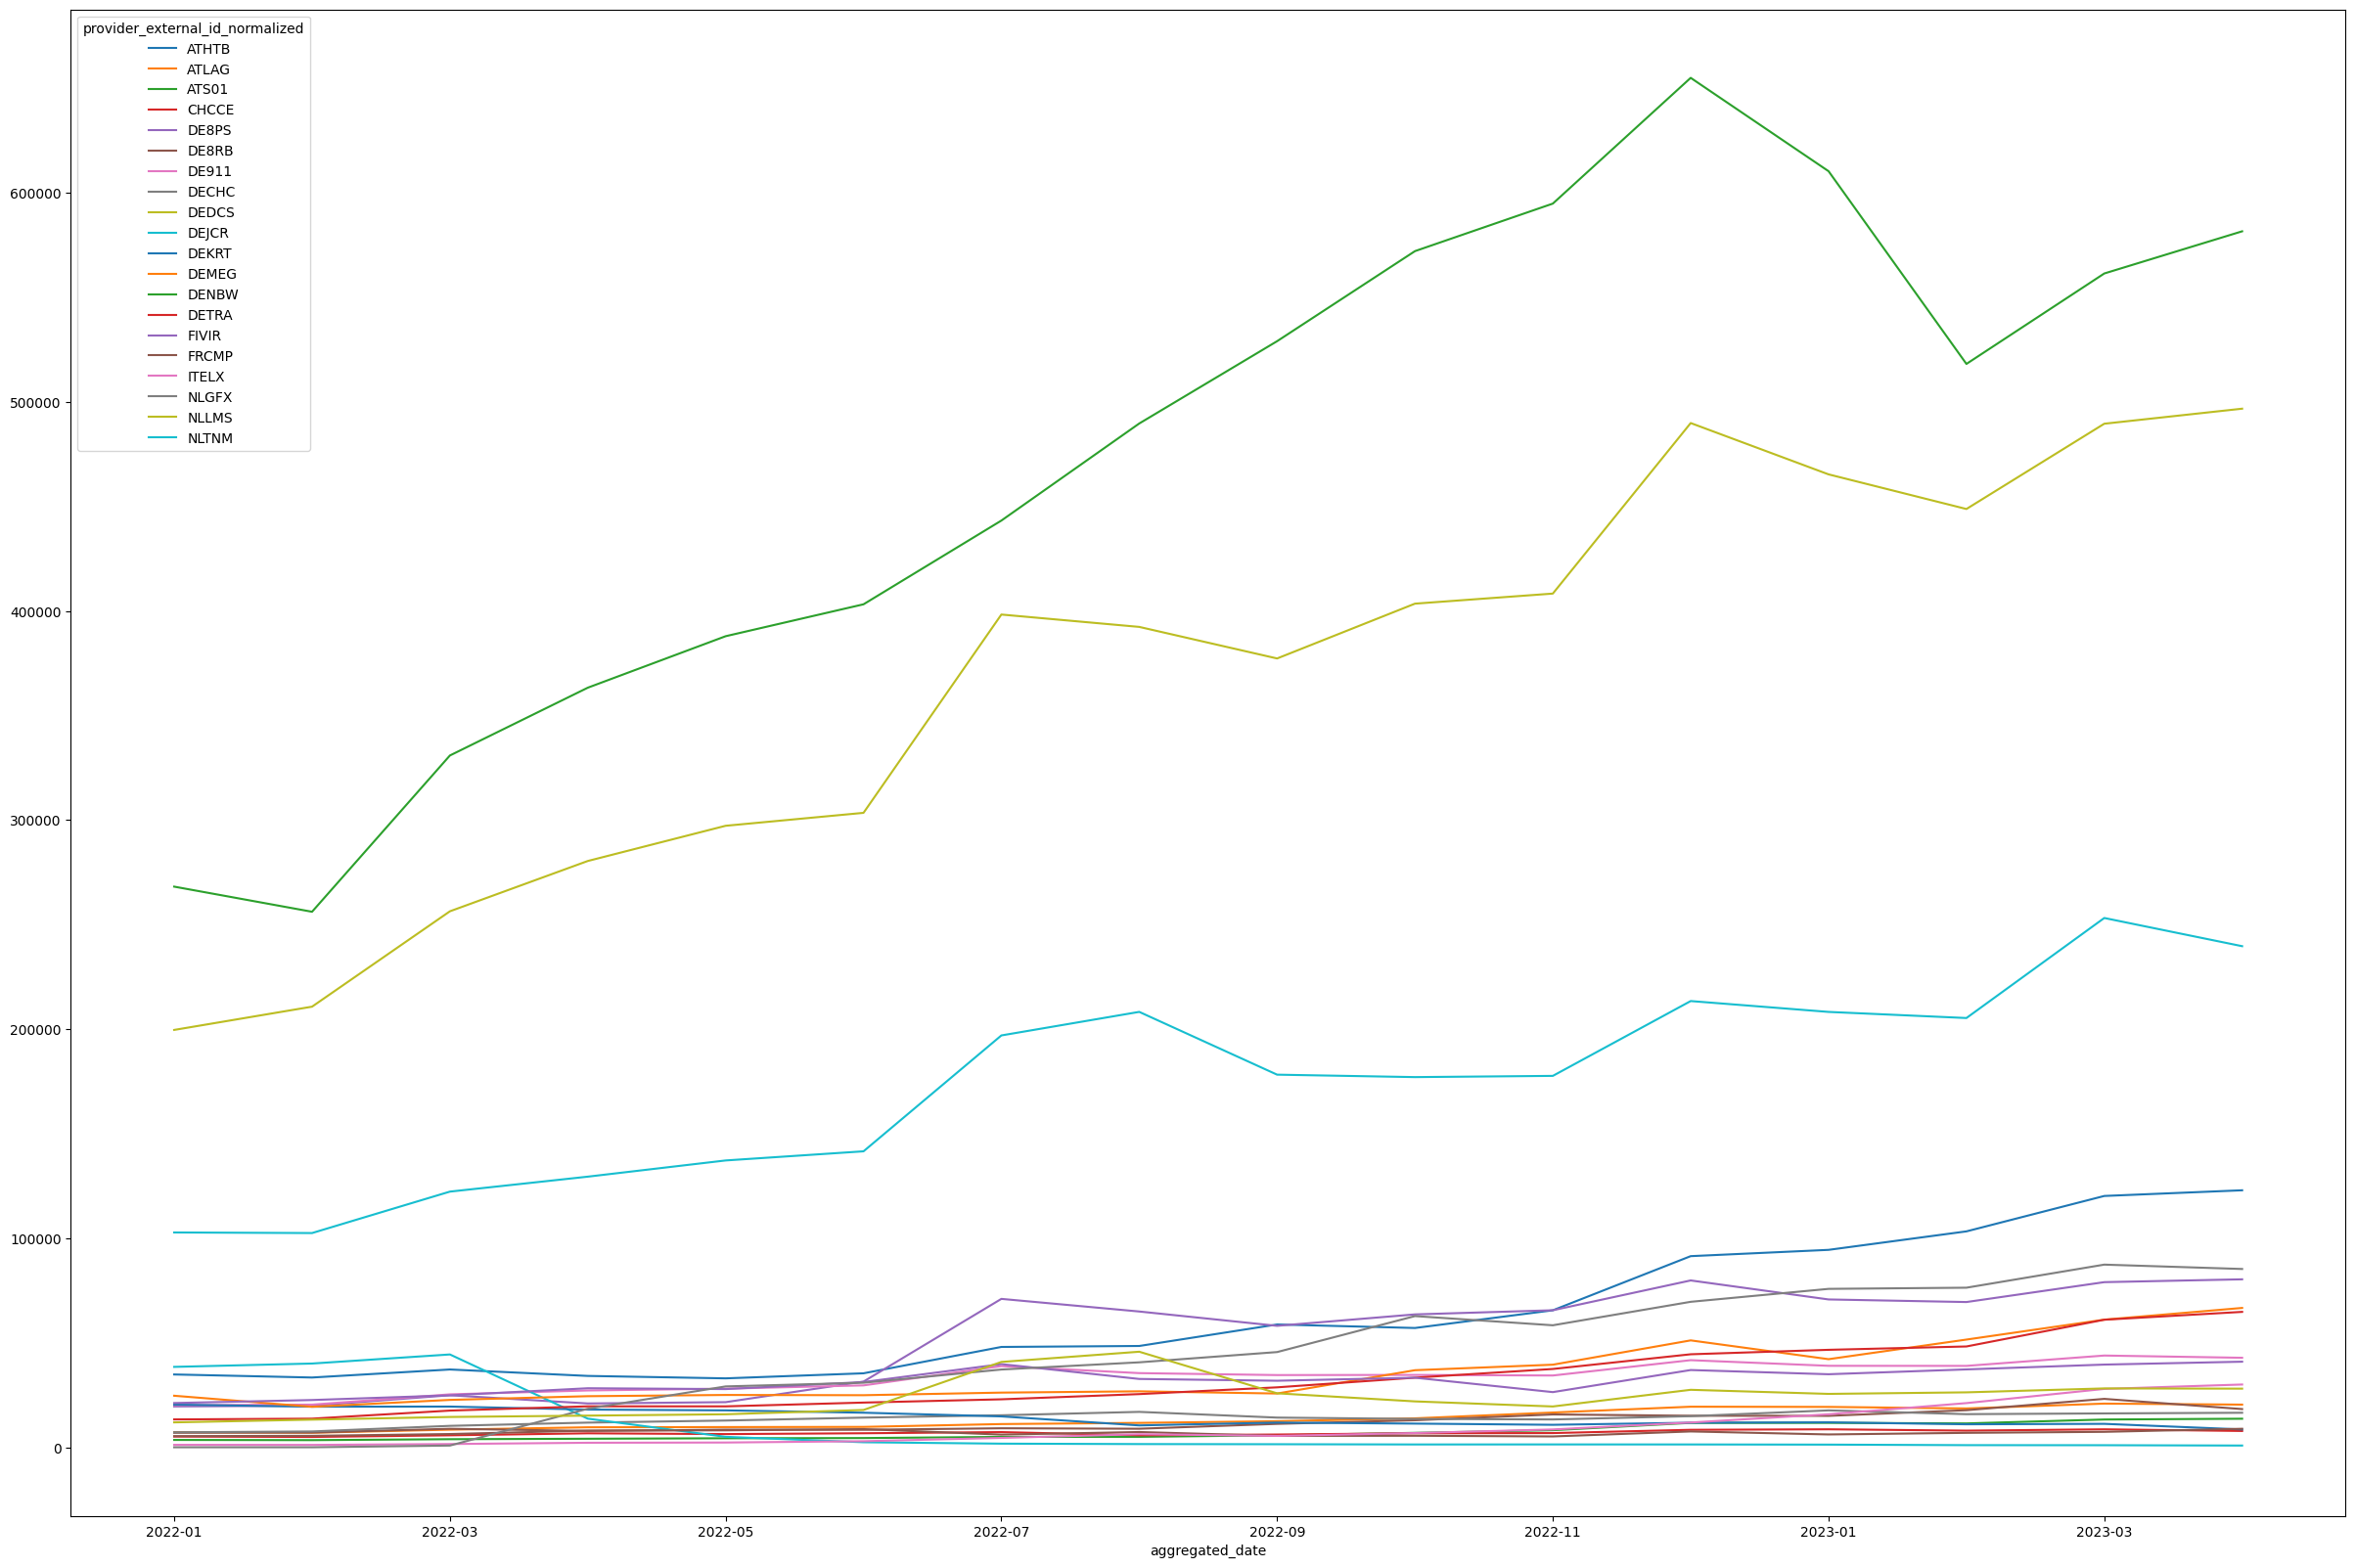

In [5]:
# filter dataframe based on top 20 EMPs
filtered_df = df[df['provider_external_id_normalized'].isin(top_emps)]

# removing the current month as it would mislead due to non existing values
filtered_df = filtered_df[filtered_df['aggregated_date'] != current_month]

# export filtered dataframe to excel for PowerBI usecase
filtered_df.to_excel(r'/Users/bita/Library/CloudStorage/OneDrive-HubjectGmbH/Jupyter Notebook/Input Data/KPI/TopEMP_hist_cdr.xlsx', index=False)

# visualise
df_pivot = pd.pivot_table(filtered_df,index='aggregated_date', columns='provider_external_id_normalized', values='monthly_cdr', aggfunc ='sum')
df_pivot.plot(figsize=(30, 20))





## All EMPs Monthly Growth

<Axes: xlabel='aggregated_date'>

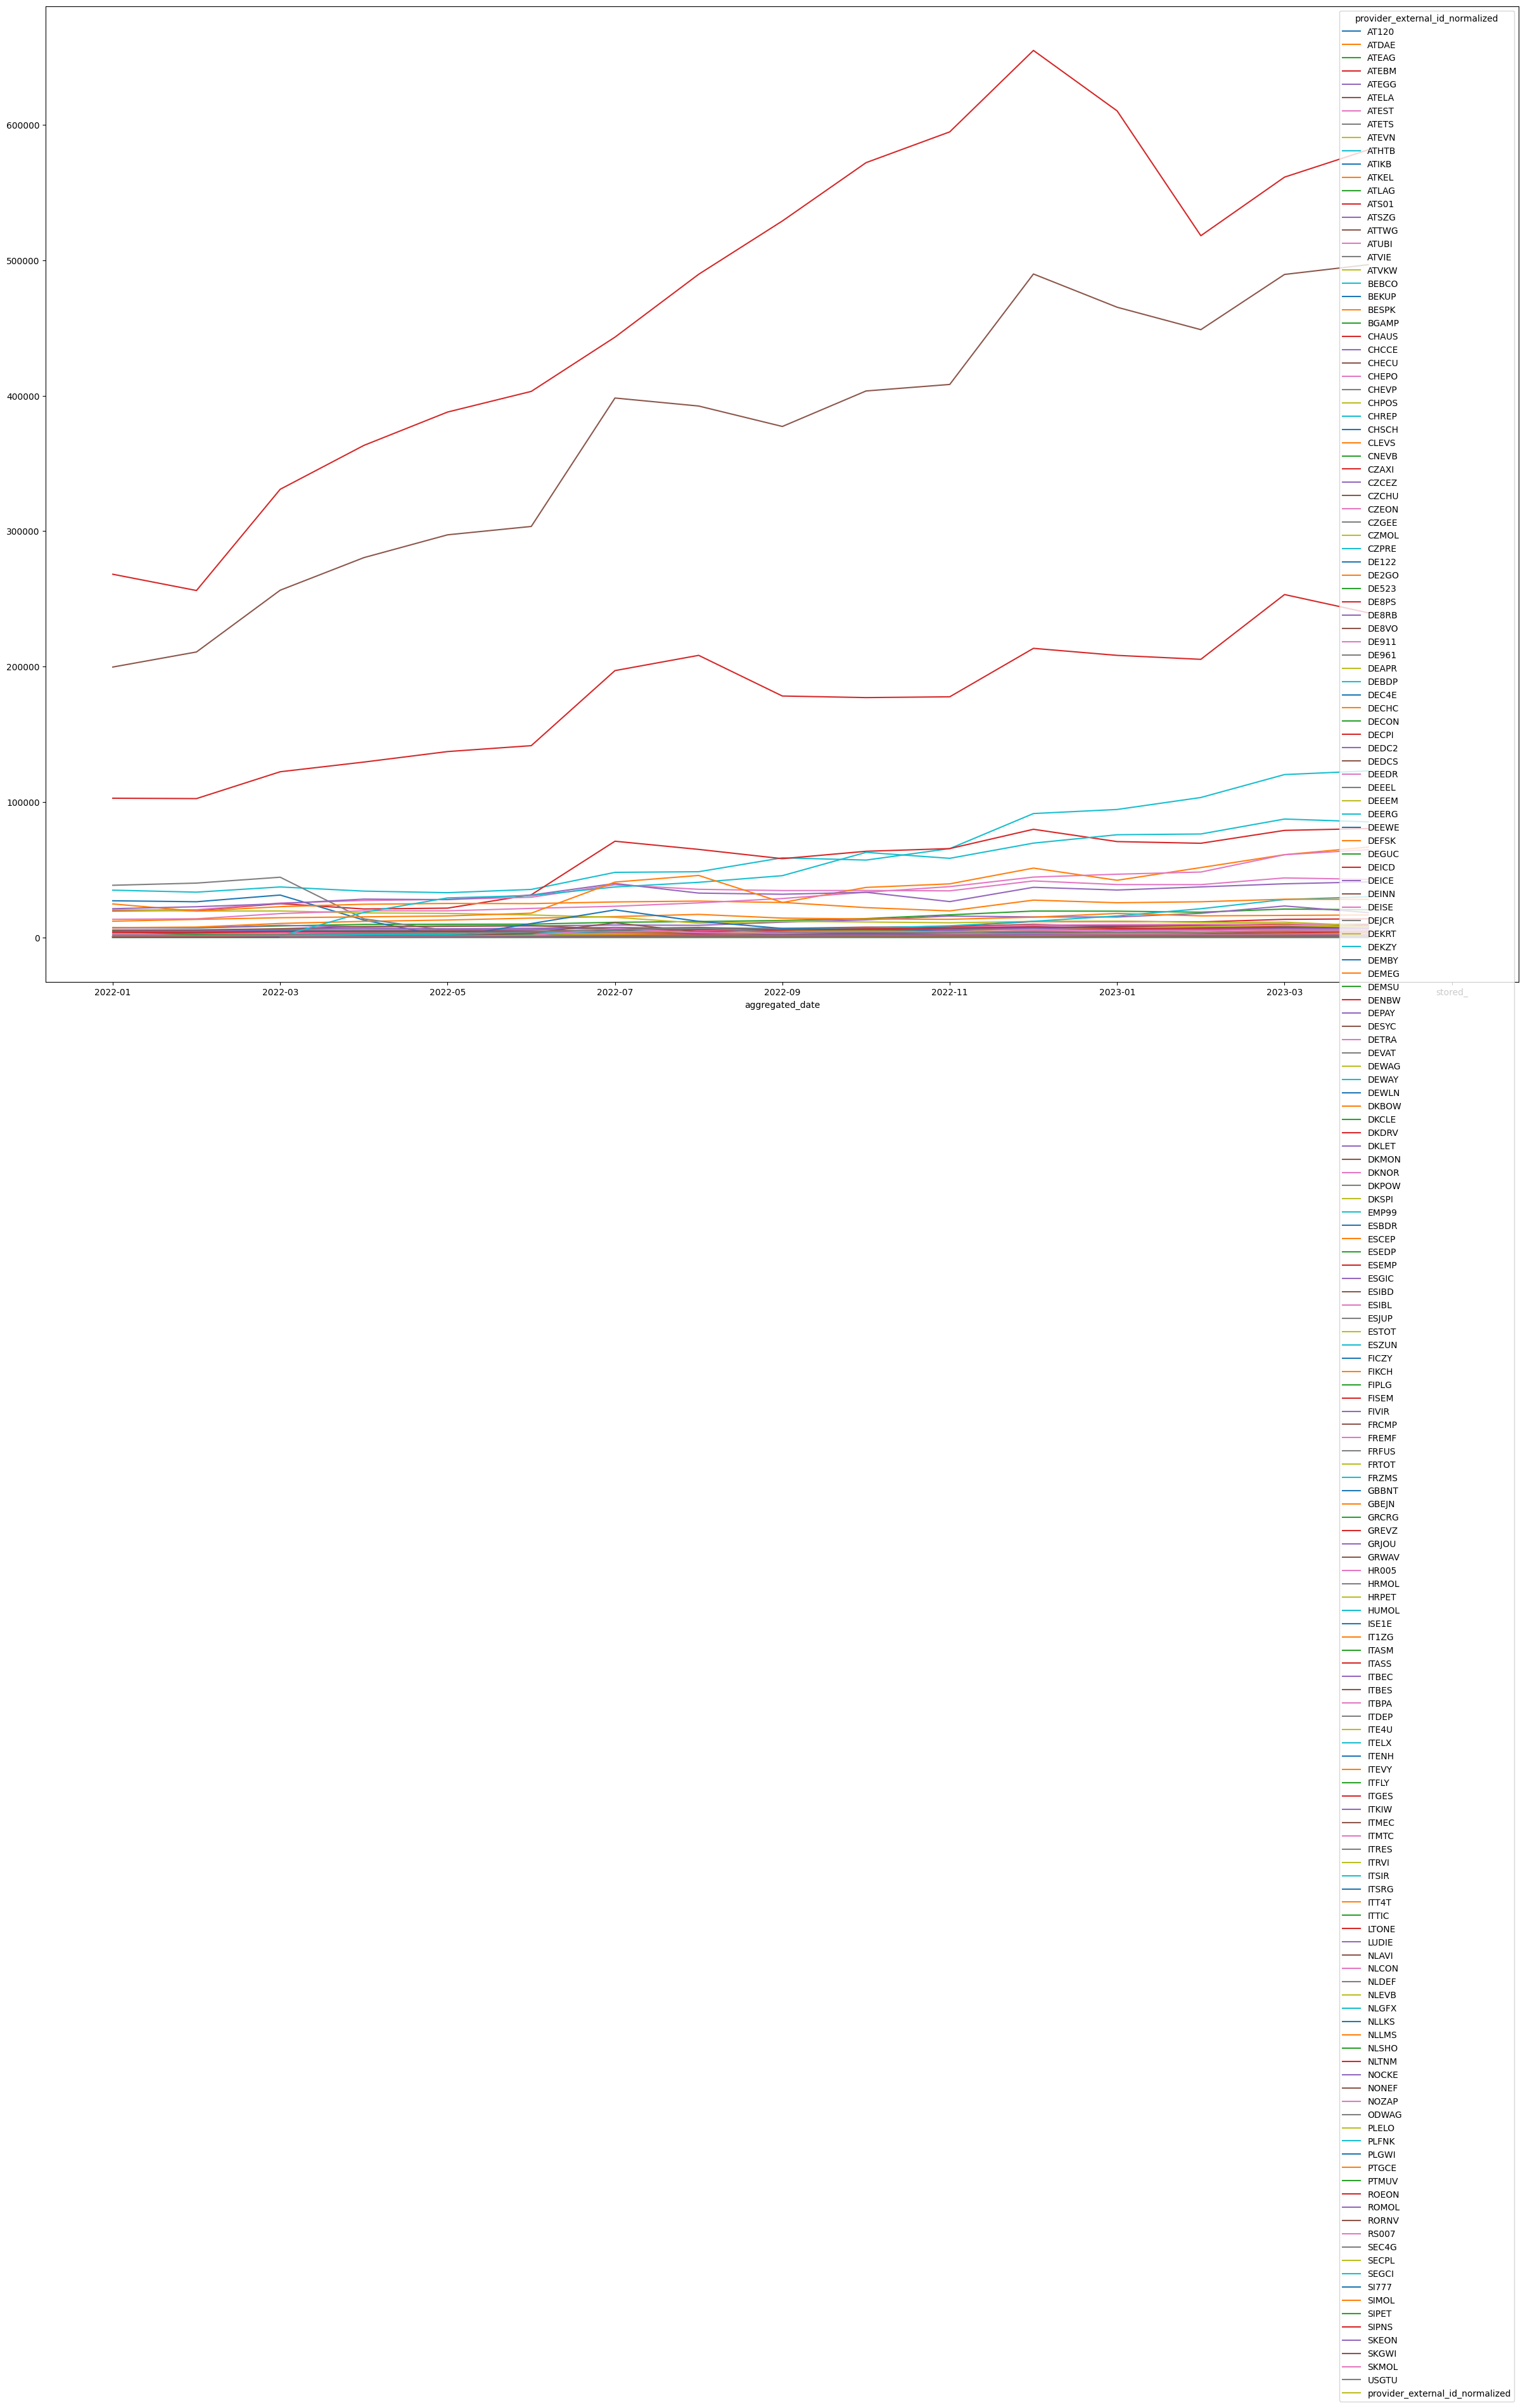

In [6]:
# removing the current month as it would mislead due to non existing values
df = df[df['aggregated_date'] != current_month]

# visualise monthly growth of all EMPs
df_pivot = pd.pivot_table(df,index='aggregated_date', columns='provider_external_id_normalized', values='monthly_cdr', aggfunc ='sum')
df_pivot.plot(figsize=(30, 20))



In [ ]:
# Close connection to Athena
conn.close()
